In [244]:
import pandas as pd

df = pd.read_csv("menu.csv", encoding = 'utf-8') #parsing csv
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [245]:
df.isnull().values.any() # we don't have NaNs so sliding widnow method isn't needed

False

In [246]:
def ctable(value):
    color = 'black'
    try: 
        if value > 25 and value in df['Total Fat'].tolist():
            color = 'green'
        elif value < 15 and value in df['Total Fat'].tolist():
            color = 'red'
    except:
        color = 'black'
    return 'color: %s' % color
s = df.head(10)[['Category','Item','Calories','Total Fat']]
s = s.sort_values(by='Total Fat', ascending = False).reset_index(drop = True).style.applymap(ctable,subset = ['Total Fat'])
s

,Category,Item,Calories,Total Fat
0,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,30.000000
1,Breakfast,Sausage McMuffin with Egg,450,28.000000
2,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",460,26.000000
3,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)",470,25.000000
4,Breakfast,Sausage McMuffin,370,23.000000
5,Breakfast,Sausage McMuffin with Egg Whites,400,23.000000
6,Breakfast,Steak & Egg McMuffin,430,23.000000
7,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)",410,20.000000
8,Breakfast,Egg McMuffin,300,13.000000
9,Breakfast,Egg White Delight,250,8.000000


In [247]:
def low_fat_calories(dataframe): #selecting low calories food
    new_df = df.sort_values(by=['Calories']).loc[(df['Total Fat']<10) & (df['Calories']<350 ),['Category','Item','Calories','Total Fat']]
    return new_df
def select_odd_sorted_fat(dataframe): #selecting odd indexes and sotring by calories 
    new_df = df.sort_values(by=['Calories'], ascending=False).iloc[df.index%2 != 0,[1,3,5]]
    return new_df
#low_fat_calories(df)
#select_odd_sorted_fat(df)

In [248]:
def high_calories_sugars(dataframe):
    new_df = dataframe[(dataframe['Calories']>= 500) | (dataframe['Sugars']>= 100)]
    return new_df
high_calories_sugars(df)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,...,36,12,2,6,2,18,6,0,10,20
13,Breakfast,Sausage Biscuit with Egg (Large Biscuit),6.2 oz (177 g),570,330,37.0,57,15.0,74,0.0,...,42,14,3,11,3,18,10,0,10,20
15,Breakfast,Sausage Biscuit with Egg Whites (Large Biscuit),6.4 oz (181 g),520,280,32.0,49,13.0,65,0.0,...,40,13,3,11,3,18,4,0,8,15
18,Breakfast,Steak & Egg Biscuit (Regular Biscuit),7.1 oz (201 g),540,290,32.0,49,16.0,78,1.0,...,38,13,2,8,3,25,10,2,20,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Smoothies & Shakes,McFlurry with M&M’s Candies (Small),10.9 oz (310 g),650,210,23.0,35,14.0,72,0.5,...,96,32,1,6,89,13,15,0,45,8
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),16.2 oz (460 g),930,290,33.0,50,20.0,102,1.0,...,139,46,2,7,128,20,25,0,70,10
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10


<AxesSubplot:>

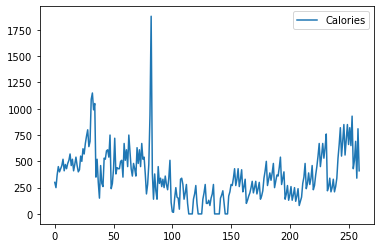

In [252]:
df.plot(y = 'Calories')
# plot_df = df.copy()[['Category','Calories']]
# menu = sns.loaddataframe(df)
# #heatmap_df = df.copy()[['Category','Calories']]
# sns.catplot(x = 'Category',y = 'Catplot', data = plot_df)
# heatmap_df
# sns.heatmap(heatmap_df,annot = True)
